In [1]:
with open('../vectors/icd10cm_codes_2018.txt', 'r+') as f:
    codes = [line[0] for line in f]        

In [12]:
from collections import Counter, defaultdict

In [13]:
counter = Counter(codes)

In [14]:
total = sum(counter.values())

In [15]:
%matplotlib inline

In [16]:
icd10 ="""A Niektóre choroby zakaźne i pasożytnicze
B Niektóre choroby zakaźne i pasożytnicze
C Nowotwory
D Choroby krwi i narządów krwiotwórczych oraz niektóre choroby przebiegające z udziałem mechaniznów autoimmunologicznych
E Zaburzenia wydzielania wewnętrznego, stanu odżywienia i przemiany metabolicznej
F Zaburzenia psychiczne i zaburzenia zachowania
G Choroby układu nerwowego
H Choroby oka i przydatków oka, ucha i wyrostka sutkowatego
I Choroby układu krążenia
J Choroby układu oddechowego
K Choroby układu trawiennego
L Choroby skóry i tkanki podskórnej
M Choroby układu kostno-mięśniowego i tkanki łącznej
N Choroby układu moczowo-płciowego
O Ciąża, poród i połóg
P Niektóre stany rozpoczynające się w okresie okołoporodowym
Q Wady rozwojowe wrodzone, zniekształcenia i aberracje chromosomowe
R Objawy, cechy chorobowe oraz nieprawidłowe wyniki badań klinicznych gdzie indziej niesklasyfikowane
S Urazy, zatrucia i inne określone skutki działania czynników zewnętrznych
T Urazy, zatrucia i inne określone skutki działania czynników zewnętrznych
U Kody specjalne
V Zewnętrzne przyczyny zachorowania i zgonu
W Zewnętrzne przyczyny zachorowania i zgonu
X Zewnętrzne przyczyny zachorowania i zgonu
Y Zewnętrzne przyczyny zachorowania i zgonu
Z Czynniki wpływające na stan zdrowia i kontakt ze służbą zdrowia"""

In [17]:
x = [(i.split()[0], i[2:]) for i in icd10.split('\n')]

In [18]:
results = defaultdict(list)
for key, title in x:
    results[title].append(key)

In [19]:
final = defaultdict(list)
for query_key, value in counter.items():
    for title, keys in results.items():
        if query_key in keys:
            final[title].append(round((value/total) * 100, 2))

In [20]:
for key, value in final.items():
    final[key] = sum(value)

In [21]:
sorted(final.items(), key=lambda x: x[1], reverse=True)

[('Urazy, zatrucia i inne określone skutki działania czynników zewnętrznych',
  56.51),
 ('Zewnętrzne przyczyny zachorowania i zgonu', 9.569999999999999),
 ('Choroby układu kostno-mięśniowego i tkanki łącznej', 9.04),
 ('Choroby oka i przydatków oka, ucha i wyrostka sutkowatego', 4.49),
 ('Ciąża, poród i połóg', 3.14),
 ('Choroby układu krążenia', 1.88),
 ('Czynniki wpływające na stan zdrowia i kontakt ze służbą zdrowia', 1.73),
 ('Nowotwory', 1.61),
 ('Niektóre choroby zakaźne i pasożytnicze', 1.4700000000000002),
 ('Zaburzenia wydzielania wewnętrznego, stanu odżywienia i przemiany metabolicznej',
  1.26),
 ('Choroby skóry i tkanki podskórnej', 1.18),
 ('Wady rozwojowe wrodzone, zniekształcenia i aberracje chromosomowe', 1.13),
 ('Choroby układu trawiennego', 1.1),
 ('Zaburzenia psychiczne i zaburzenia zachowania', 1.04),
 ('Choroby krwi i narządów krwiotwórczych oraz niektóre choroby przebiegające z udziałem mechaniznów autoimmunologicznych',
  1.02),
 ('Objawy, cechy chorobowe oraz 

In [22]:
values = list(map(lambda x: x[1], sorted(final.items(), key=lambda x: x[1], reverse=True)[:8]))

In [23]:
values.append(round(100 - sum(values), 2))

In [24]:
values

[56.51, 9.569999999999999, 9.04, 4.49, 3.14, 1.88, 1.73, 1.61, 12.03]

In [25]:
titles = list(map(lambda x: x[0], sorted(final.items(), key=lambda x: x[1], reverse=True)[:8]))

In [26]:
titles.append('Inne')

In [31]:
import numpy as np
import matplotlib.pyplot as plt

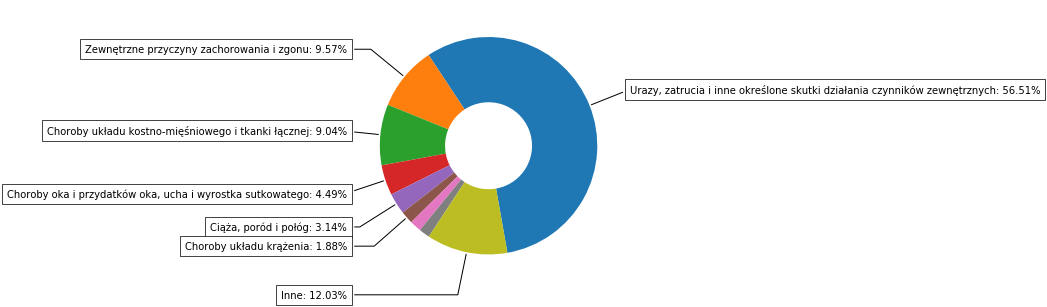

In [46]:
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(values, wedgeprops=dict(width=0.6), startangle=-80)

bbox_props = dict(boxstyle="square, pad=0.5", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center", size=10)

for i, p in enumerate(wedges):
    if values[i] > 1.8:
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate('{}: {}%'.format(titles[i], round(values[i], 2)), xy=(x, y), xytext=(1.3*np.sign(x), 1.4*y),
                     horizontalalignment=horizontalalignment, **kw)

plt.savefig('donut.png', bbox_inches = 'tight')

In [ ]:
plt.savefig('donut.png', bbox_inches = 'tight')